![image.png](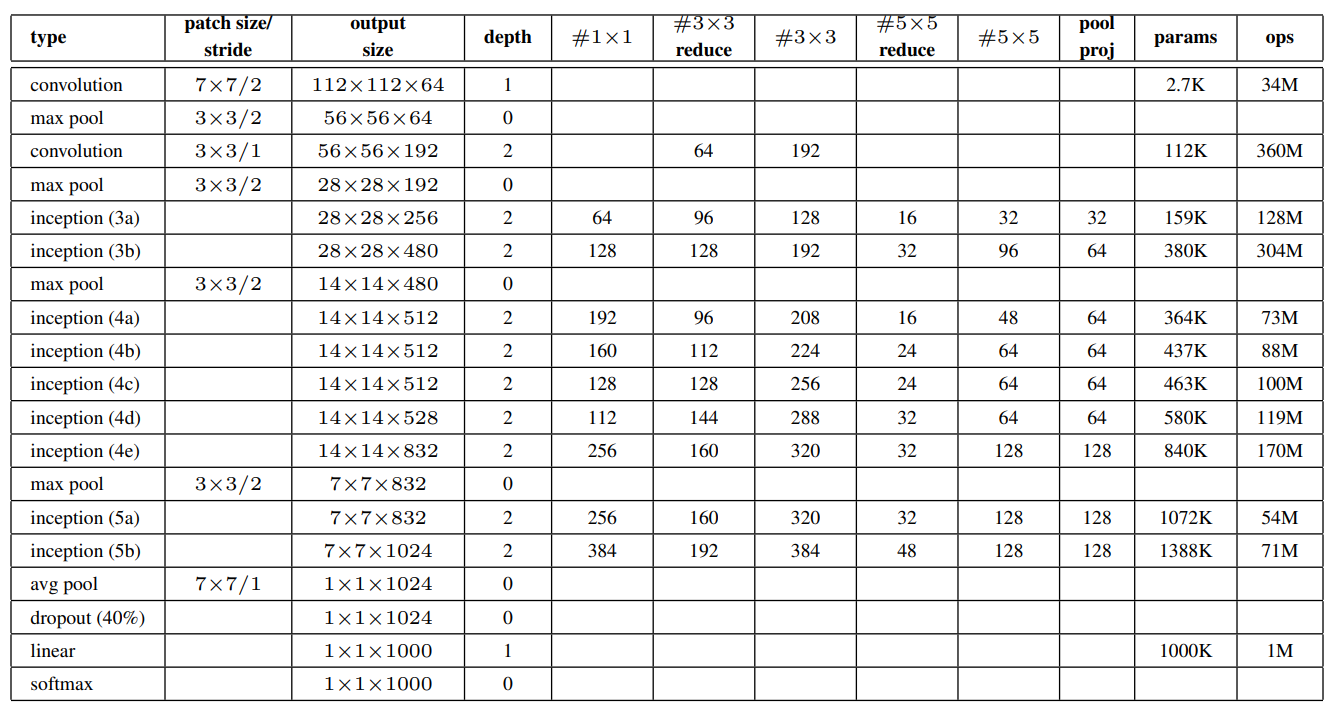vB7bNsMAF9y/RZ+w8fDdnHAZMuYCum3disXV5dRkl7oRuxhK3lTieJiDtpDemLF2PnWFx2gREScuvYN+oNP63vAfM20zA6ZICTq6eAZ/jKRDSzuDX+T44Ep2AK7t+xny/81Co4rDv52+x5vANxIUHY+nSbfifQonrO5bD6/fz6tcbhrFdaiDl5By0rm6MLotuwXriQDTQeYrfnD/D1JAw7F4wAP3m30D1miXTE6yqeAiGtVBJEo/QuX3Rd+pWXBLzuERU9CjCV8DJ2hrWn7VCu7mnUba8HsKWdEbrDuqYtR2WnsluyLUCkesHoPusJxgeGITJLfXFuEhWE71X7oRXk90YbOOBA9q5g7NSIHyFk7oOa3zWqh3mni6L8nphWNK5NTpo3o/dUmRfdSTWD+iOWU+GIzBoMl6vujdW7vRCk92DYeNxANlWnd+6ZZ9gjJ8/XNOWobvtFKwK2o3d6jZ8Qjc7bCg/DYHrh8D4xZdOarJPxsDP3xVpy7rDdsoqBO3ejcAVE9DNbgPKTwvE+iHG2psDvZDf8pS9Ct2WIfBHCxxzc4LHql/h6zkEI7ZUxoytPhhcm2uQiIiIiIiKN4mgJv6cKwcHB0gkEvj5+YmR/y4lJQWlSskQd/Mqop6WQq1PTFE528vh5IiNvIanBqb4uGrp/GVi5Q9w9UYqjMxqQq8gUriqRNy9GoO0j8xgrK/pFCrxJCoCj8rVQ73s3zzlg2Y70/D399c+04fDzMwMLi4ucHd3FyPFSQKOL/dEmKUHRrU0EGPZUMZg+4J1SOo/Cw71CiiplHAcyz3DYOkxCrlXvR0L1iWh/ywHFFTVQCJiTobg6IVbeC4tD+NmHfC5hVHOIwATY3Ay5Cgu3HoOaXljNOvwOSyMchkvmN/y71BUVBRMTU0RHh4Oc3NzMVpEKeJw43wY7pY0RsMGtWBQxKfSTEhIgL6+PkJCQrSJdioali5dCm9vb0RGRooRKgo07ZCrqysmTpwoRqiwHThwAJ06dUJiYiLKli0rRqmw2dnZaT+PjRs3ihEqbI8ePULlypURGhqK1q1bi1HKiWb79fX1hb29vRihosDJyQkKhQIBAQFihAqCo6MjVCoVtmzZIkZyVqgjNUuV0iQBdVC+ljmaN8kpoalRGlXqNYRZfhOaGqWrwqx+ASU0NaS6qFG/gZjQ1JChYt1GTGgSfdD0YDVmYe4JTQ2ZMWxnzC24hKaGnhXGLMw9oakhM7bFjLkFmdDU0IVxq54YOHI0XIc7oXtuCU0NXWO06jkQI0e7YrhT9zcnKPNbnrKnUx61LdrBqnHRT2gSERERERHlVaEmNYmIiIiIiIiIiIjyi0lNIiIiIiIiIiIiKlaY1CQiIiIiIiIiIqJihUlNIiIiIiIiIiIiKlaY1CQiIiIiIiIiIqJihUlNIiIiIiIiIiIiKlaY1CQiIiIiIiIiIqJiRSKoiT/nasaMGbh79y5GjBghRogK3po1a7TPI0eO1D7Th2PatGlo3749unbtKkaIiq7Y2Fh4eHhg/vz5qFGjhhilgiCXy+Hq6orJkyfjk08+EaNU2Pbs2YMjR45g4cKFYoSKgqlTp6Jjx47o3LmzGKHCFhERgaVLl2L16tUoWbKkGKXCtnLlSu3n4eLiIkaosCUkJGDs2LGYPn066tatK0YpJ6NGjcLQoUNhaWkpRqgo8Pb2hkql0n4+VHA061XTx5o3b54YyVmek5oaEolE/ImIiIiIiIiIiIioYGmSxXnJQeYrqfngwQPxJyIiIiIiIiIiIqKCVbVqVfGn3OUrqUlERERERERERERU2HijICIiIiIiIiIiIipWmNQkIiIiIiIiIiKiYoVJTSIiIiIiIiIiIipWmNQkIiIiIiIiIiKiYoVJTSIiIiIiIiIiIipWmNQkIiIiIiIiIiKiYoVJTSIiIiIiIiIiIipWmNQkIiIiIiIiIiKiYoVJTSIiIiIiIiIiIipWmNQkIiIiIiIiIiKiYgT4P88xD/INLs+oAAAAAElFTkSuQmCC)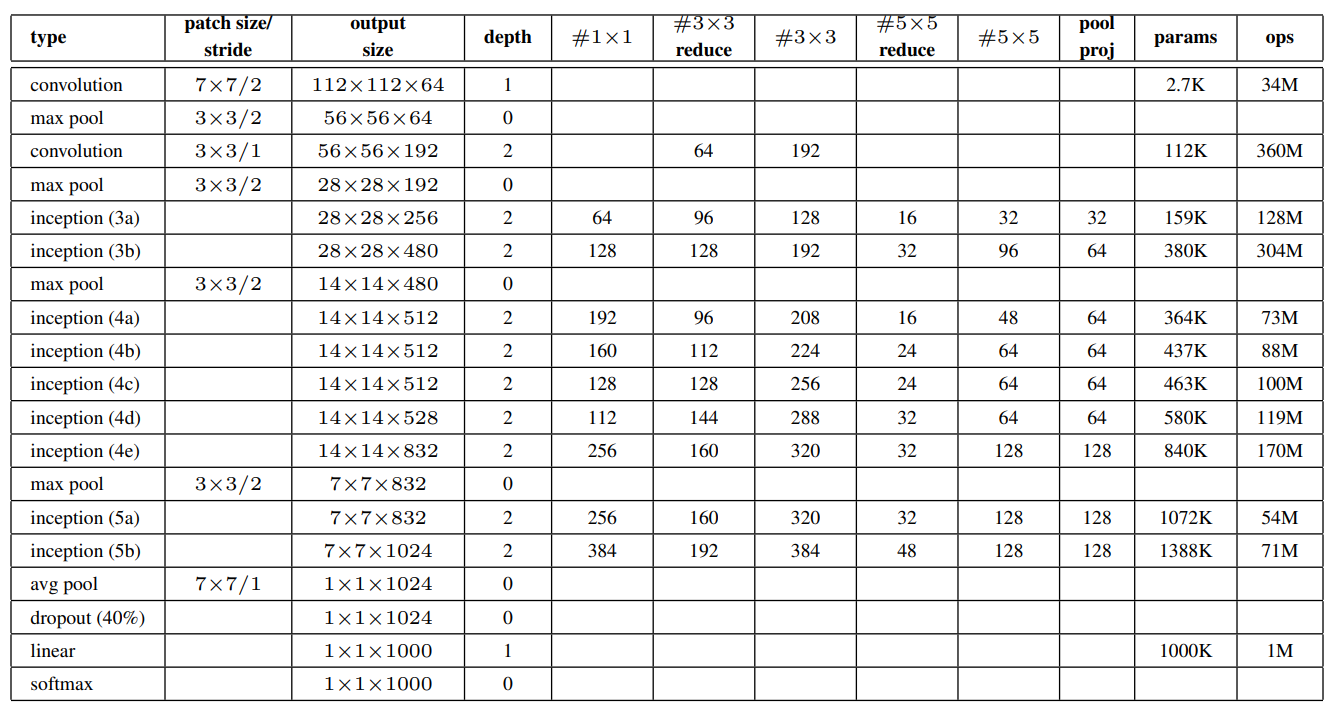

# 0. Model Architecture

## 0. Imports & Global Variables

In [1]:
import torch
import torch.nn as nn

from collections import namedtuple
from typing import Optional
from torch import Tensor

GoogLeNetOutputs = namedtuple("GoogLeNetOutputs", ["logits", "aux_logits1", "aux_logits2"])
GoogLeNetOutputs.__annotations__ = {"logits": Tensor, "aux_logits2": Optional[Tensor], "aux_logits1": Optional[Tensor]}

## 1. Layers

In [29]:
# ConvBlock Layer Implement
class ConvBlock(nn.Module):
    def __init__(self, in_channel, out_channel, k, s, p):
        super(ConvBlock, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(in_channels=in_channel, out_channels=out_channel,kernel_size = (k, k), stride=(s,s), padding=(p,p)),
            nn.BatchNorm2d(out_channel, eps=0.001),
            nn.ReLU()
        )
    
    def forward(self, input):
        output = self.convolution(input)
        return output

In [3]:
# ReduceConvBlock Implment
class ReduceConvBlock(nn.Module):
    def __init__(self, in_channel, out_channel, out_channel_r, k, p):
        super(ReduceConvBlock,self).__init__()
        self.ReduceConvBlock = nn.Sequential(
            nn.Conv2d(in_channels=in_channel, out_channels=out_channel_r, kernel_size=(1,1), stride=(1,1), padding=(0,0)),
            nn.ReLU(),
            nn.Conv2d(in_channels = out_channel_r, out_channels=out_channel, kernel_size=(k,k), stride=(1,1), padding=(p,p)),
            nn.ReLU()
        )
    
    def forward(self, input):
        output = self.ReduceConvBlock(input)
        return output

In [4]:
# Inception Module Implement
class InceptionModule(nn.Module):
    def __init__(self, in_channel,  out_channel_1x1, out_channel_3x3, out_channel_reduce_3x3, out_channel_5x5, out_channel_reduce_5x5, pool_proj):
        super(InceptionModule, self).__init__()
        self.conv1 = ConvBlock(in_channel, out_channel_1x1, 1, 1, 0)
        self.conv3 = ReduceConvBlock(in_channel, out_channel_reduce_3x3, out_channel_3x3, 3, 1)
        self.conv5 = ReduceConvBlock(in_channel, out_channel_reduce_5x5, out_channel_5x5, 5, 2)

        self.pool_proj = nn.Sequential(
            nn.MaxPool2d(kernel_size=(1,1), stride=(1,1)), # (1,1)
            nn.Conv2d(in_channel, pool_proj, kernel_size=(1,1), stride=(1,1)),
            nn.ReLU()
        )

    
    def forward(self, input):
        out1 = self.conv1(input)
        out2 = self.conv3(input)
        out3 = self.conv5(input)
        out4 = self.pool_proj(input)

        out = torch.cat([out1, out2, out3, out4], dim=1)
        return out 

In [5]:
class AuxClassifier(nn.Module):
    def __init__(self, in_channel, num_classes=1000):
        super(AuxClassifier, self).__init__()
        self.AveragePool = nn.AvgPool2d(kernel_size=(5,5), stride=(3,3)) # padding?
        self.Conv = nn.Conv2d(in_channels=in_channel, out_channels=128, kernel_size=(1,1), stride=(1,1))
        self.FC1 = nn.Linear(4*4*128, 1024)
        self.ReLU = nn.ReLU()
        self.Dropout = nn.Dropout(p=0.1) # Someone Implement with p = 0.7 TODO : Why?
        self.Classifier = nn.Linear(1024, num_classes)

    def forward(self, input):
        batch_size = input.shape[0]
        out = self.AveragePool(input)
        out = self.Conv(out)
        out = self.ReLU(out)
        out = out.reshape(batch_size, -1)
        out = self.FC1(out)
        out = self.Dropout(out)
        out = self.Classifier(out)
        # 여기서 Softmax를 하지 않는 이유는 이후 Loss 계산시에 CEL을 사용하는데
        # 해당 Loss 계산시에 LogSoftmax(일종의 SoftmaxActivation)를 취하기 때문.

        return out

## 2. Model Architecture

In [35]:
class GoogleNet(nn.Module):
    def __init__(self, in_channel=3, num_class=1000, training=True): # R,G,B + ImageNet Label Class
        super(GoogleNet, self).__init__()
        self.training = training

        self.Conv1 = ConvBlock(in_channel, 64, 7, 2, 3) 
        self.MaxPool1 = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2), padding=(1,1))
        self.LocalRespNorm1 = nn.LocalResponseNorm(size=64)

        self.Conv2 = nn.Sequential(
            ConvBlock(64, 64, 1, 1, 0), # Reduced Convolution (1x1)
            ConvBlock(64, 192, 3, 1, 1) # Normal Convolution (3x3)
        )
        self.MaxPool2 = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2), padding=(1,1)) # padding은 ceil_mode임

        self.LocalRespNorm2 = nn.LocalResponseNorm(size=192)
        self.inception3a = InceptionModule(192, 64, 96, 128, 16, 32, 32)     # 64 + 128 + 32 + 32 = 256 (Next Layer Input channel size : 256)
        self.inception3b = InceptionModule(256, 128, 128, 192, 32, 96, 64)   # 128 + 192 + 96 + 64 = 480 (Next Layer Input channel size : 480)
        self.MaxPool3 = nn.MaxPool2d(kernel_size=(3,3), stride=(2,2), padding=(1,1)) # PyTorch에서의 padding은 ceil_mode임

        self.inception4a = InceptionModule(480, 192, 96, 208, 16, 48, 64)
        self.AuxClassifier1 = AuxClassifier(512, num_class)

        self.inception4b = InceptionModule(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = InceptionModule(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = InceptionModule(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = InceptionModule(528, 256, 160, 320, 32, 128, 128)
        self.MaxPool4 = nn.MaxPool2d(kernel_size=(3,3), stride=(1,1), padding=(1,1)) 

        self.inception5a = InceptionModule(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = InceptionModule(832, 384, 192, 384, 48, 128, 128)

        self.AuxClassifier2 = AuxClassifier(528, num_class)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        self.classifier = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(1024, num_class) # 여기 왜 1024 * 7 * 7??
        )
    def _forward(self, input):

        Batch_size = input.shape[0]
        x = self.Conv1(input)
        x = self.MaxPool1(x)
        # x = self.LocalRespNorm1(x)
        x = self.Conv2(x)
        x = self.MaxPool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.MaxPool3(x)
        x = self.inception4a(x)
        aux1: Optional[Tensor] = None
        if self.AuxClassifier1 is not None:
            if self.training:
                aux1 = self.AuxClassifier1(x)

        
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        aux2: Optional[Tensor] = None
        if self.AuxClassifier1 is not None:
            if self.training:
                aux2 = self.AuxClassifier2(x)
        
        x = self.inception4e(x)
        x = self.MaxPool4(x)
        x = self.inception5a(x)
        x = self.inception5b(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)

        if self.training == False:
            assert aux1 is None
            assert aux2 is None

        return x, aux1, aux2

    def forward(self, input):
        x, aux1, aux2 = self._forward(input)
        aux_defined = self.training 
        if aux_defined:
            return GoogLeNetOutputs(x, aux1, aux2)
        else:
            return x
    
    def val_mode(self, Training=True):
        self.training = Training

# Train

## 0. Requirements & Imports

In [7]:
# kaggle.json 옮기기.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alessiocorrado99/animals10

mkdir: cannot create directory ‘/root/.kaggle’: File exists
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!pip install albumentations==0.4.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.jit as jit

from torchvision import models # for prototype

import os
from glob import glob
from tqdm import tqdm
from collections import defaultdict

import cv2
import numpy as np
from sklearn.metrics import f1_score
import albumentations as A
from albumentations.pytorch import ToTensorV2
from albumentations.pytorch.transforms import ToTensor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt

In [10]:
translate = {
    "cane": "dog", 
    "cavallo": "horse", 
    "elefante": "elephant", 
    "farfalla": "butterfly", 
    "gallina": "chicken", 
    "gatto": "cat", 
    "mucca": "cow", 
    "pecora": "sheep", 
    "ragno": "spider",
    "scoiattolo": "squirrel", 
    "dog": "cane", 
    "horse": "cavallo", 
    "elephant" : "elefante", 
    "butterfly": "farfalla", 
    "chicken": "gallina", 
    "cat": "gatto", 
    "cow": "mucca", 
    "sheep": "pecora",
    "spider": "ragno", 
    "squirrel": "scoiattolo"
    }


In [11]:
CLASS_NUMBER = {
    "butterfly": 0,
    "cat": 1,
    "chicken": 2,
    "cow": 3,
    "dog": 4,
    "elephant": 5,
    "horse": 6,
    "sheep": 7,
    "spider": 8,
    "squirrel": 9
}

In [12]:
# !unzip ./animals10.zip -d .

## 1. EDA

먼저 Image 파일외에 다른 파일이 있는 지 확인

In [13]:
file_list = glob(os.path.join('./raw-img/*' , '*'))

file_extension_set = set()
for file_path in file_list:
    file_name = file_path.split('/')[-1]
    file_extension = file_name.split('.')[-1]
    file_extension_set.add(file_extension)
file_extension_set

{'jpeg', 'jpg', 'png'}

Dataset의 Class Imbalance가 존재하는지 확인.

In [14]:
label_encoder = CLASS_NUMBER
label_decoder = {v:k for k, v in label_encoder.items()}

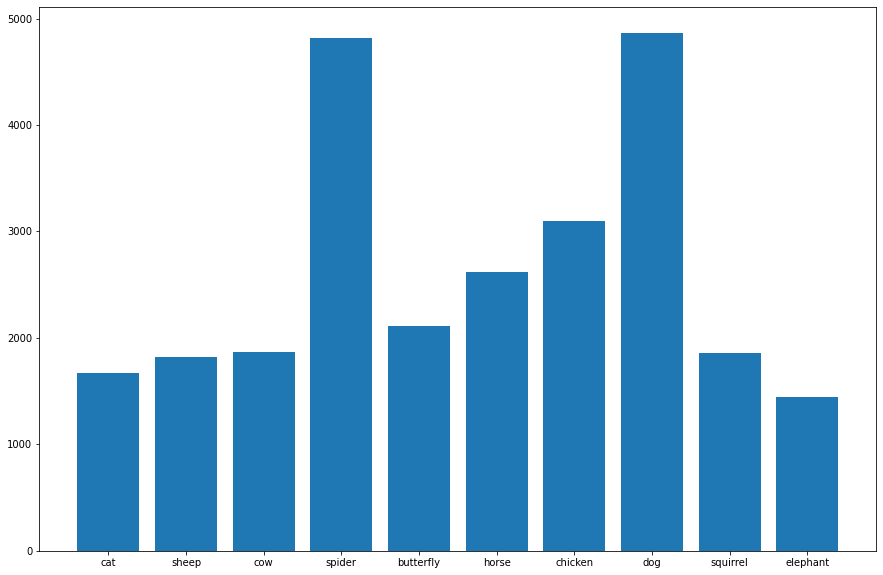

In [15]:
file_dir = glob(os.path.join('./raw-img', '*'))

class_dict = dict()

for label_dir in file_dir:
    label_name = label_dir.split('/')[-1]
    class_dict[label_name] = len(glob(os.path.join(label_dir, '*')))

class_dict

fig, axes = plt.subplots(figsize=(15,10))
x_y = [(k,v) for k, v in class_dict.items()]
x = [translate[x] for x, y in x_y]
y = [y for x, y in x_y]
plt.bar(x, y)
plt.show()

## 2. torch.utils.data.Dataset 정의

In [16]:
class AnimalDataset(Dataset):
    def __init__(self, data, label ,translator=None, label_encoder=None, transform=None, mode='train'):
        self.data = data
        self.label = label
        self.transform = transform
        self.mode = mode
        self.label_encoder = label_encoder
        self.label_decoder = {v:k for k,v in self.label_encoder.items()} 
        self.translator = translator

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = cv2.imread(self.data[idx])
        
        if self.transform:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = self.transform(image=image)['image']
        else:
            image = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_AREA) # interpolation is default option
            image = image.astype(np.flot32)/255
            image = np.transpose(image, (2, 0, 1)) # Because of Tenosr dimention
        return{
            'image' : torch.tensor(image, dtype=torch.float32),
            'label' : torch.tensor(self.label_encoder[self.label[idx]], dtype=torch.long)
        }
    

## 3. Transform 정의

In [17]:
def get_train_transforms():
    return A.Compose([
            A.Resize(256,256),
            A.OneOf([
                A.HorizontalFlip(p=1.0),    # Horizontal로 Flip (위 아래)
                A.VerticalFlip(p=1.0),      # Vertical로 Flip (양 옆)
                A.ShiftScaleRotate(p=0.3),  # 각도로 돌리는 것
            ], p=0.7),
            ToTensorV2(p=1.0),
        ], p=1.)
  
        
def get_valid_transforms():
    return A.Compose([
            A.Resize(256,256),
            ToTensorV2(p=1.0),
        ], p=1.)

## 4. 학습 Configuration 정의 (Hyperparameter)

In [18]:
device = torch.device("cuda:0")
batch_size = 32
class_n = len(CLASS_NUMBER)
learning_rate = 2e-4 
dropout_rate = 0.1
epochs = 30
vision_pretrain = True

## 5. Train/Test Split

In [19]:
data = file_list
target = [translate[x.split('/')[2]] for x in file_list]
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, stratify=target, random_state=34)

## 6. Training Process 정의

In [20]:
def accuracy_function(real, pred):    
    real = real.cpu()
    pred = torch.argmax(pred, dim=1).cpu()
    score = f1_score(real, pred, average='macro')
    return score

def train_step(model, batch_item, training):
    img = batch_item['image'].to(device)
    label = batch_item['label'].to(device)

    if training is True:
        model.train()
        optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            label_out = model(img) # model(img, csv_feature) 
            loss = 0.0
            loss += criterion_class(label_out.logits, label)
            loss += criterion_class(label_out.aux_logits1, label)
            loss += criterion_class(label_out.aux_logits2, label)
        loss.backward()
        optimizer.step()
        
        return loss, torch.argmax(label_out.logits, dim=1).detach().cpu().numpy(), label.detach().cpu().numpy()
    else:
        model.eval()
        with torch.no_grad():
            label_out = model(img) # model(img, csv_feature) 
            loss = criterion_class(label_out, label)
        return loss, torch.argmax(label_out, dim=1).detach().cpu().numpy(), label.detach().cpu().numpy(),

In [21]:
# def __init__(self, data, label ,translator=None, label_encoder=None, transform=None, mode='train'):
train_dataset = AnimalDataset(
    x_train,  # TODO: 여기를 train_set 그 자체가 들어갈 수 있도록 해야할 듯 파일 경로로.
    y_train,
    translator=translate, 
    label_encoder = CLASS_NUMBER,
    transform=get_train_transforms(),
    mode='train'
    )
val_dataset = AnimalDataset(
    x_valid,  # TODO: 여기를 train_set 그 자체가 들어갈 수 있도록 해야할 듯 파일 경로로.
    y_valid,
    translator=translate, 
    label_encoder = CLASS_NUMBER,
    transform=get_valid_transforms(),
    mode='validation'
    )

## 7. Dataset 무결성 시각화 (Augmentation 확인)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Text(0.5, 1.0, 'cow')

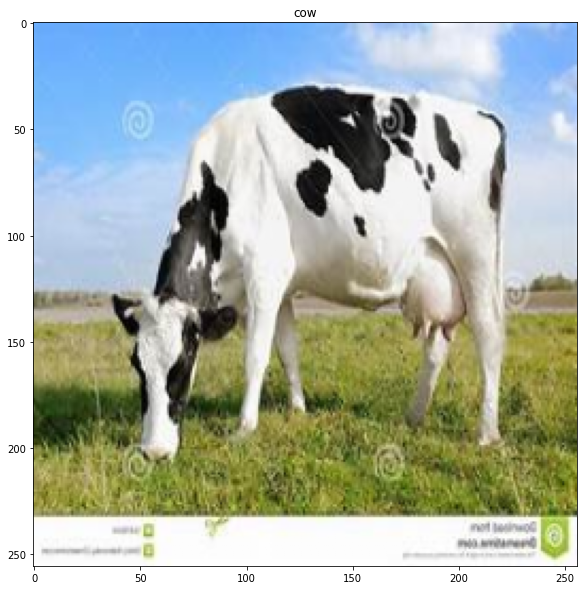

In [22]:
fig, axes = plt.subplots(figsize=(10,10))

plt.imshow(train_dataset[1]['image'].permute(1, 2, 0)/255.0)
plt.title(label_decoder[train_dataset[1]['label'].item()])

In [23]:
# 학습 결과를 담을 list
loss_plot, val_loss_plot = [], []
metric_plot, val_metric_plot = [], []

## 7. 모델 무결성 검사.

In [36]:
model = GoogleNet(in_channel = 3, num_class = len(CLASS_NUMBER), training=True)
model = model.to(device)

x = torch.randn(3, 3, 224, 224).to(device)
output = model(x)
print(output.logits.shape)
print(output.aux_logits1.shape)
print(output.aux_logits2.shape)

torch.Size([3, 10])
torch.Size([3, 10])
torch.Size([3, 10])


In [ ]:
# jit_net = torch.jit.script(GoogleNet(in_channel = 3, num_class = len(CLASS_NUMBER), training=True))
# print(jit_net.code)
# print(jit_net.graph)

In [37]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=2, shuffle=True)


max_f1_score = 0
model = GoogleNet(in_channel = 3, num_class = len(CLASS_NUMBER), training=True)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion_class = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss()

scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=1e-6, last_epoch=-1)

for epoch in range(epochs):
    total_loss, val_total_loss = 0.0, 0.0
    tqdm_dataset_train = tqdm(enumerate(train_dataloader), total=len(train_dataloader))
    is_training = True
    model.val_mode(Training=is_training)
    true_label_list = []
    pred_label_list = []
    val_true_label_list = []
    val_pred_label_list = []

    for batch, batch_item in tqdm_dataset_train:
        loss, pred_label, true_label = train_step(model, batch_item, is_training)
        total_loss += loss

        tqdm_dataset_train.set_postfix({
            'Train Epoch' : epoch + 1,
            'Total Loss' : f'{total_loss/(batch + 1): .4f}'
        })
        true_label_list.extend(list(true_label))
        pred_label_list.extend(list(pred_label))
    print(f"\nTrain F-1 Score : {f1_score(true_label_list, pred_label_list, average='macro')}")
    loss_plot.append(total_loss/(batch + 1)) # 5-Fold시 바꿔야함.
    metric_plot.append(f1_score(true_label_list, pred_label_list, average='macro'))

    with torch.no_grad():
        tqdm_dataset_valid = tqdm(enumerate(val_dataloader), total = len(val_dataloader))
        is_training = False
        model.val_mode(Training=is_training)
        for batch, batch_item in tqdm_dataset_valid:
            loss, pred_label, true_label  = train_step(model, batch_item, is_training)
            val_total_loss += loss;
                        
            tqdm_dataset_valid.set_postfix({
                'Validation Epoch': epoch + 1,
                'Total Loss' : '{:04f}'.format(val_total_loss/(batch+1)),
            })
            val_true_label_list.extend(list(true_label))
            val_pred_label_list.extend(list(pred_label))
        validation_f1_score = f1_score(val_true_label_list, val_pred_label_list, average='macro')
        print(f"\nValidation F-1 Score: {validation_f1_score}")
        val_loss_plot.append(val_total_loss/(batch+1))
        val_metric_plot.append(validation_f1_score)
        # if np.max(val_metric_plot) == val[-1]:
        if validation_f1_score > max_f1_score:
            max_f1_score = validation_f1_score
            torch.save(model.state_dict(), f'./best_model.pt')

  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.39it/s, Train Epoch=1, Total Loss=4.6098]



Train F-1 Score : 0.3683246319962485


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.44it/s, Validation Epoch=1, Total Loss=1.285788]



Validation F-1 Score: 0.4645608153673946


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=2, Total Loss=3.4873]



Train F-1 Score : 0.5395855561956276


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:13<00:00, 12.42it/s, Validation Epoch=2, Total Loss=1.454414]


Validation F-1 Score: 0.4344984605149066



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=3, Total Loss=2.9867]



Train F-1 Score : 0.6115958278405247


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.15it/s, Validation Epoch=3, Total Loss=0.965869]



Validation F-1 Score: 0.6267063485196452


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=4, Total Loss=2.6624]



Train F-1 Score : 0.6677830539748786


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.05it/s, Validation Epoch=4, Total Loss=0.956842]



Validation F-1 Score: 0.659093770216592


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=5, Total Loss=2.4322]



Train F-1 Score : 0.7008404060131401


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.07it/s, Validation Epoch=5, Total Loss=0.804081]



Validation F-1 Score: 0.6923872823533894


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=6, Total Loss=2.2254]



Train F-1 Score : 0.7290802371939614


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.93it/s, Validation Epoch=6, Total Loss=0.720441]



Validation F-1 Score: 0.7339879938659295


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=7, Total Loss=2.0757]



Train F-1 Score : 0.7510423369061671


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.33it/s, Validation Epoch=7, Total Loss=0.969342]


Validation F-1 Score: 0.6665632275140819



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=8, Total Loss=1.9214]



Train F-1 Score : 0.7712729120589177


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.34it/s, Validation Epoch=8, Total Loss=0.660676]



Validation F-1 Score: 0.7703481535450578


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=9, Total Loss=1.8029]



Train F-1 Score : 0.7948365923854105


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.48it/s, Validation Epoch=9, Total Loss=0.615857]


Validation F-1 Score: 0.75461319785846



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=10, Total Loss=1.6792]



Train F-1 Score : 0.8044097467543823


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.26it/s, Validation Epoch=10, Total Loss=0.668910]


Validation F-1 Score: 0.7541723127099897



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:41<00:00,  6.42it/s, Train Epoch=11, Total Loss=1.6063]



Train F-1 Score : 0.8167206624858654


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.12it/s, Validation Epoch=11, Total Loss=0.696461]


Validation F-1 Score: 0.7600170005573693



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=12, Total Loss=1.5174]



Train F-1 Score : 0.8279197079211974


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.22it/s, Validation Epoch=12, Total Loss=0.611361]



Validation F-1 Score: 0.7852898252235148


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=13, Total Loss=1.4075]



Train F-1 Score : 0.8418514267853932


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.42it/s, Validation Epoch=13, Total Loss=0.671583]



Validation F-1 Score: 0.7487819838652588


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=14, Total Loss=1.3172]



Train F-1 Score : 0.8529110342093272


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.95it/s, Validation Epoch=14, Total Loss=0.578944]



Validation F-1 Score: 0.7961024264221621


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=15, Total Loss=1.2539]



Train F-1 Score : 0.8605773934658135


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.15it/s, Validation Epoch=15, Total Loss=0.602704]



Validation F-1 Score: 0.7880876611548818


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=16, Total Loss=1.2005]



Train F-1 Score : 0.8659342867628184


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.23it/s, Validation Epoch=16, Total Loss=0.533005]



Validation F-1 Score: 0.8112974784254234


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=17, Total Loss=1.1155]



Train F-1 Score : 0.8762950624454502


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.90it/s, Validation Epoch=17, Total Loss=0.688146]


Validation F-1 Score: 0.7778153891814164



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=18, Total Loss=1.0779]


Train F-1 Score : 0.8818042015627219



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.14it/s, Validation Epoch=18, Total Loss=0.649257]


Validation F-1 Score: 0.7840754816528349



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=19, Total Loss=1.0064]


Train F-1 Score : 0.8889816719989186



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.03it/s, Validation Epoch=19, Total Loss=0.655627]


Validation F-1 Score: 0.7784945689595733



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=20, Total Loss=0.9584]


Train F-1 Score : 0.89576443346854



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.29it/s, Validation Epoch=20, Total Loss=0.685321]


Validation F-1 Score: 0.782506771244899



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=21, Total Loss=0.9091]


Train F-1 Score : 0.9023883939136004



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:13<00:00, 12.60it/s, Validation Epoch=21, Total Loss=0.817595]


Validation F-1 Score: 0.7657494305287235



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=22, Total Loss=0.8675]


Train F-1 Score : 0.906516827516537



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.29it/s, Validation Epoch=22, Total Loss=0.515469]



Validation F-1 Score: 0.8328722321876476


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=23, Total Loss=0.8302]


Train F-1 Score : 0.9100998666680118



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.91it/s, Validation Epoch=23, Total Loss=0.470443]



Validation F-1 Score: 0.8473526756756105


  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.39it/s, Train Epoch=24, Total Loss=0.7644]


Train F-1 Score : 0.915918265910854



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.06it/s, Validation Epoch=24, Total Loss=0.510856]


Validation F-1 Score: 0.8361252230662176



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.42it/s, Train Epoch=25, Total Loss=0.7514]


Train F-1 Score : 0.9220676629960287



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.43it/s, Validation Epoch=25, Total Loss=0.627856]


Validation F-1 Score: 0.8143357504584436



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.40it/s, Train Epoch=26, Total Loss=0.6950]



Train F-1 Score : 0.9249586352694941


  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:13<00:00, 12.58it/s, Validation Epoch=26, Total Loss=0.601068]


Validation F-1 Score: 0.8169409835899437



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=27, Total Loss=0.6857]


Train F-1 Score : 0.927229741983895



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.85it/s, Validation Epoch=27, Total Loss=0.738909]


Validation F-1 Score: 0.7654605035727295



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.41it/s, Train Epoch=28, Total Loss=0.6516]


Train F-1 Score : 0.9323734547036837



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.23it/s, Validation Epoch=28, Total Loss=0.564029]


Validation F-1 Score: 0.8338901084288375



  0%|          | 0/655 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.39it/s, Train Epoch=29, Total Loss=0.6179]


Train F-1 Score : 0.9340356275192144



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 12.92it/s, Validation Epoch=29, Total Loss=0.581996]


Validation F-1 Score: 0.8300787219773363



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 655/655 [01:42<00:00,  6.39it/s, Train Epoch=30, Total Loss=0.6026]


Train F-1 Score : 0.9392681858724667



  0%|          | 0/164 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
100%|██████████| 164/164 [00:12<00:00, 13.38it/s, Validation Epoch=30, Total Loss=0.648561]


Validation F-1 Score: 0.8159956420947687
